# Step 1 - Age 109

## After debug everything, what if we use fixed nodes M??

Answer is: no problem at all.

In [1]:
import os
print(os.getcwd())
os.chdir('C:\\Users\\u5819317\\Desktop\\Python for QuantEco\\LifeCycle_0')
print(os.getcwd())

C:\Users\u5819317\Desktop\Python for QuantEco\LifeCycle_0
C:\Users\u5819317\Desktop\Python for QuantEco\LifeCycle_0


In [2]:
import pandas as pd
interestTable = pd.read_csv('return_H.csv', usecols=[1,2,3])  ## Read in interest rate
mortalityTable = pd.read_csv('newmort2.csv', usecols=[1,2,3])  ## Read in mortality table

import numpy as np
from datascience import Table
Expectation = Table.from_df(interestTable)  ## Convert readin csv file to 'table'

ρ = 5
grids = 200

#M = np.arange(0.000001,2000000,50000)     ###### This need to think twice!!
M109 = np.arange(20000.0, 2000001, int(2000001/grids))

Z = 0  ## Income

def func(θ):
    Expect1 = 1 + θ*Expectation.column('Eq') + (1-θ)*Expectation.column('Bond')
    Expect2 = np.power(Expect1, -ρ)
    Expect3 = Expectation.column('Eq') - Expectation.column('Bond')
    Expect4 = Expectation.column('Probability') * (Expect2*Expect3)
    return Expect4.sum()

from scipy.optimize import root

### Try to wrap everything in a function (compute optimal C109 and θ109)
def Optimal_109():
    sol = root(func, 0.5)  ## 0.5 is the starting point of θ
    θ109 = sol.x    # sol.fun is the value of the objective equation, very close to zero
                    ## Should add constraint [0,1] on θ in further calculation.
    
    ## After obtain optimal θ109, next calculate C109
    Expect1 = 1 + θ109 * Expectation.column('Eq') + (1-θ109) * Expectation.column('Bond')
    Expect5 = np.power(Expect1, 1-ρ) * Expectation.column('Probability')
    C109 = np.power((1-mortalityTable['X'][108]) * np.power(M109, -ρ) * Expect5.sum(), -1/ρ) 
    ## change 108 to [age-1] when do the iteration
    return C109, θ109

(C109, θ109) = Optimal_109()
print('Optimal risky assets allocation rate at 109 is ' + str(θ109))
print('Optimal consumption at 109 is ' + str(C109))

Optimal risky assets allocation rate at 109 is [0.48775782]
Optimal consumption at 109 is [  22808.87801202   34213.31701803   45617.75602404   57022.19503005
   68426.63403605   79831.07304206   91235.51204807  102639.95105408
  114044.39006009  125448.8290661   136853.26807211  148257.70707812
  159662.14608413  171066.58509014  182471.02409615  193875.46310216
  205279.90210816  216684.34111417  228088.78012018  239493.21912619
  250897.6581322   262302.09713821  273706.53614422  285110.97515023
  296515.41415624  307919.85316225  319324.29216826  330728.73117427
  342133.17018027  353537.60918628  364942.04819229  376346.4871983
  387750.92620431  399155.36521032  410559.80421633  421964.24322234
  433368.68222835  444773.12123436  456177.56024037  467581.99924637
  478986.43825238  490390.87725839  501795.3162644   513199.75527041
  524604.19427642  536008.63328243  547413.07228844  558817.51129445
  570221.95030046  581626.38930647  593030.82831248  604435.26731848
  615839.70632

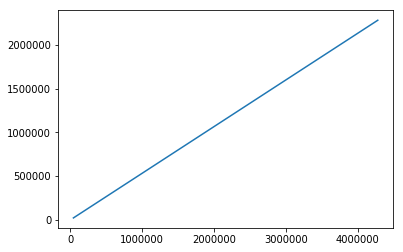

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

A109 = M109 - Z + C109
plt.plot(A109, C109)  ## A linear relationship

In [4]:
Optimal_results = Table().with_columns([ ## Collect the results (optimal consumption Cx \
    'M109', M109,                             ## and the corresponding Ax/Mx) into a table
    'C109', C109,
    'A109', A109,
])

Optimal_θx = Table()
Optimal_results.show(10) ## Consume nearly a half of the saving balance at age 109

M109,C109,A109
20000,22808.9,42808.9
30000,34213.3,64213.3
40000,45617.8,85617.8
50000,57022.2,107022
60000,68426.6,128427
70000,79831.1,149831
80000,91235.5,171236
90000,102640,192640
100000,114044,214044
110000,125449,235449


# For age 108 only

In [5]:
from scipy.interpolate import interp1d

M108 = M109
Optimal_results = Optimal_results.with_column('M%(age)1d'%{'age':108},M108)
print(Optimal_results)


M109   | C109    | A109    | M108
20000  | 22808.9 | 42808.9 | 20000
30000  | 34213.3 | 64213.3 | 30000
40000  | 45617.8 | 85617.8 | 40000
50000  | 57022.2 | 107022  | 50000
60000  | 68426.6 | 128427  | 60000
70000  | 79831.1 | 149831  | 70000
80000  | 91235.5 | 171236  | 80000
90000  | 102640  | 192640  | 90000
100000 | 114044  | 214044  | 100000
110000 | 125449  | 235449  | 110000
... (189 rows omitted)


[0.48775782311866817, 0.4877578231186681, 0.487757823118668, 0.4877578231186681, 0.4877578231186681, 0.4877578231186683, 0.4877578231186682, 0.48775782311866794, 0.48775782311866783, 0.487757823118668, 0.48775782311866805, 0.4877578231186681, 0.4877578231186682, 0.487757823118668, 0.487757823118668, 0.4877578231186683, 0.4877578231186684, 0.4877578231186681, 0.48775782311866817, 0.48775782311866805, 0.4877578231186679, 0.4877578231186678, 0.48775782311866783, 0.48775782311866805, 0.4877578231186681, 0.4877578231186682, 0.48775782311866805, 0.4877578231186683, 0.4877578231186682, 0.48775782311866817, 0.48775782311866794, 0.4877578231186679, 0.4877578231186681, 0.4877578231186683, 0.48775782311866817, 0.4877578231186682, 0.48775782311866805, 0.48775782311866794, 0.487757823118668, 0.487757823118668, 0.4877578231186681, 0.4877578231186681, 0.4877578231186681, 0.487757823118668, 0.48775782311866794, 0.487757823118668, 0.487757823118668, 0.4877578231186681, 0.4877578231186681, 0.48775782311

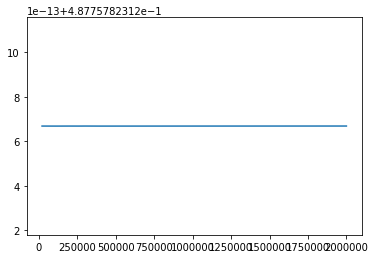

In [6]:
def theta(x):
    Interpo1 = 1 + (1-x)*Expectation.column('Bond') + x*Expectation.column('Eq')
    Interpo2 = node * Interpo1 ## A109_Interpo given M108 (node)
    
    Interpolation = interp1d(A109, C109, kind='quadratic', fill_value='extrapolate')
    Interpo3 = Interpolation(Interpo2) / Optimal_results.column(1)[M108==node] 
    
    Interpo4 = np.power(Interpo3, -ρ) * (Expectation.column('Eq') - Expectation.column('Bond'))
    Interpo5 = Expectation.column('Probability') * Interpo4
    return(Interpo5.sum())

θ108 = []
for node in M108:
    solution = root(theta, 0.5)
    θ = float(solution.x)
    if θ <= 0: ## Constraint
        θ = 0
    elif θ >= 1:
        θ = 1
    θ108.append(θ)

print(θ108)  ## list not an array
plt.plot(M108, θ108)

In [7]:
C108 = []
for index, node in enumerate(M108):
    cal1 = 1 + (1-θ108[index])*Expectation.column('Bond') + θ108[index]*Expectation.column('Eq')
    
    cal2 = node * cal1
    # print(cal2) ## to see whether A109(M108) is close to A109(M109) after I changed the node M108
    
    Interpolation = interp1d(A109, C109, kind='linear', fill_value='extrapolate')
    cal3 = Interpolation(cal2)
    cal4 = np.power(cal3, -ρ) * cal1 * Expectation.column('Probability')
    cal5 = cal4.sum()
    cal6 = np.power(cal5 * (1-mortalityTable['X'][107]), -1/ρ)
    
    C108.append(cal6)
print(C108)

[12109.69322710837, 18164.539840662554, 24219.386454216736, 30274.23306777092, 36329.07968132511, 42383.92629487929, 48438.77290843347, 54493.61952198766, 60548.46613554184, 66603.31274909603, 72658.15936265021, 78713.0059762044, 84767.85258975858, 90822.69920331278, 96877.54581686696, 102932.39243042114, 108987.23904397532, 115042.0856575295, 121096.93227108369, 127151.77888463787, 133206.62549819206, 139261.47211174623, 145316.31872530043, 151371.16533885463, 157426.01195240882, 163480.858565963, 169535.70517951716, 175590.55179307135, 181645.39840662555, 187700.24502017972, 193755.09163373391, 199809.93824728808, 205864.78486084228, 211919.63147439648, 217974.47808795064, 224029.32470150484, 230084.171315059, 236139.0179286132, 242193.8645421674, 248248.71115572157, 254303.55776927577, 260358.40438282996, 266413.25099638413, 272468.0976099383, 278522.9442234925, 284577.7908370467, 290632.6374506009, 296687.4840641551, 302742.33067770925, 308797.1772912634, 314852.02390481764, 320906

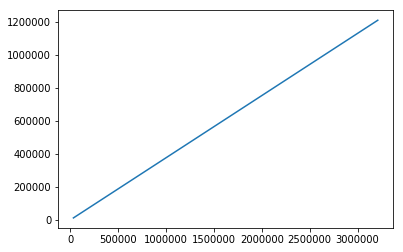

In [8]:
A108 = M108 - Z + C108
plt.plot(A108, C108)

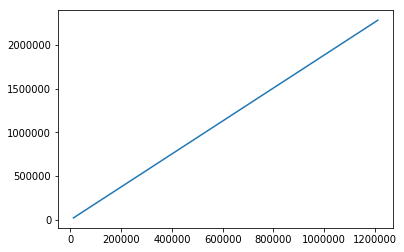

In [9]:
plt.plot(C108, C109)

# Step 2 - Age 108-65

### A new version for different Mx

In [10]:
import time
start_time = time.time()  ## Calculate the time needed to run the calculation

from scipy.interpolate import interp1d

for i in range(44): ## age 108-65 --> i from 0 to 43 (include)
    Mx = M109
    ### The decisions made here is quite arbitrary!!
    
    Optimal_results = Optimal_results.with_column('M%(age)1d'%{'age':108-i},Mx)
    
    def theta(x):
        Interpo1 = 1 + (1-x)*Expectation.column('Bond') + x*Expectation.column('Eq')
        Interpo2 = node * Interpo1  ## node is the value for each Mx
    
        Interpolation = interp1d(Optimal_results.column(3*i+2), Optimal_results.column(3*i+1), \
                                 kind='linear', fill_value='extrapolate')
        ### i is from iteration of age
        
        ## Interpo3 = Interpolation(Interpo2)
        Interpo3 = Interpolation(Interpo2) / Optimal_results.column(3*i+1)[Mx==node] 
        ###### Divided by a constant here and get a value close to 1, for later take power of -ρ.
        Interpo4 = np.power(Interpo3, -ρ) * (Expectation.column('Eq') - Expectation.column('Bond'))
        Interpo5 = Expectation.column('Probability') * Interpo4
        
        ## print(float(Interpo5.sum())) test whether the new transformation is reasonable. \
        ## Yes, a good way is to work on Interpo3
        return(Interpo5.sum())

    θx = []
    for node in Mx:
        solution = root(theta, 0.5)
        θ = float(solution.x)
        if θ <= 0: ## Constraint
            θ = 0
        elif θ >= 1:
            θ = 1
        θx.append(θ)
    Optimal_θx = Optimal_θx.with_column('θ%(age)1d'%{'age':108-i},θx)
    
    ## After obtaining optimal θx, we can compute optimal consumption. For each node in M there is a θx and a Cx
    Cx = []
    for index, node in enumerate(Mx):
        cal1 = 1 + (1-θx[index])*Expectation.column('Bond') + θx[index]*Expectation.column('Eq')
        cal2 = node * cal1
        Interpolation = interp1d(Optimal_results.column(3*i+2), Optimal_results.column(3*i+1), \
                                 kind='quadratic', fill_value='extrapolate')
        cal3 = Interpolation(cal2)
        cal4 = np.power(cal3, -ρ) * cal1 * Expectation.column('Probability')
        ### Could be a potential issue, when we choose node=0 and take power of -ρ
        cal5 = cal4.sum()
        cal6 = np.power(cal5 * (1-mortalityTable['X'][107-i]), -1/ρ)  ### i is from iteration of age (0,42) include
        Cx.append(cal6)
    
    # Cx = np.nan_to_num(Cx)  ### Transform 'NaN' to zero
    Optimal_results = Optimal_results.with_column('C%(age)1d'%{'age':108-i},Cx)

    Ax = Mx - Z + Cx
    Optimal_results = Optimal_results.with_column('A%(age)1d'%{'age':108-i},Ax)
    
    del(Mx)
    del(Cx)
    del(Ax)
    del(θx)

print("--- %s seconds ---" % (time.time() - start_time))

--- 10.652117252349854 seconds ---


In [11]:
Optimal_results.show()

M109,C109,A109,M108,C108,A108,M107,C107,A107,M106,C106,A106,M105,C105,A105,M104,C104,A104,M103,C103,A103,M102,C102,A102,M101,C101,A101,M100,C100,A100,M99,C99,A99,M98,C98,A98,M97,C97,A97,M96,C96,A96,M95,C95,A95,M94,C94,A94,M93,C93,A93,M92,C92,A92,M91,C91,A91,M90,C90,A90,M89,C89,A89,M88,C88,A88,M87,C87,A87,M86,C86,A86,M85,C85,A85,M84,C84,A84,M83,C83,A83,M82,C82,A82,M81,C81,A81,M80,C80,A80,M79,C79,A79,M78,C78,A78,M77,C77,A77,M76,C76,A76,M75,C75,A75,M74,C74,A74,M73,C73,A73,M72,C72,A72,M71,C71,A71,M70,C70,A70,M69,C69,A69,M68,C68,A68,M67,C67,A67,M66,C66,A66,M65,C65,A65
20000,22808.9,42808.9,20000,12109.7,32109.7,20000,8540.61,28540.6,20000,6751.78,26751.8,20000,5673.23,25673.2,20000,4948.37,24948.4,20000,4424.27,24424.3,20000,4026.34,24026.3,20000,3711.96,23712,20000,3455.25,23455.2,20000,3239.64,23239.6,20000,3056.83,23056.8,20000,2897.26,22897.3,20000,2754.49,22754.5,20000,2624.19,22624.2,20000,2503.42,22503.4,20000,2390.28,22390.3,20000,2283.55,22283.6,20000,2182.55,22182.5,20000,2086.95,22087,20000,1996.68,21996.7,20000,1911.61,21911.6,20000,1831.61,21831.6,20000,1756.48,21756.5,20000,1686.03,21686,20000,1620.03,21620,20000,1558.25,21558.2,20000,1500.45,21500.5,20000,1446.42,21446.4,20000,1395.91,21395.9,20000,1348.71,21348.7,20000,1304.59,21304.6,20000,1263.33,21263.3,20000,1224.73,21224.7,20000,1188.59,21188.6,20000,1154.75,21154.7,20000,1123.03,21123,20000,1093.29,21093.3,20000,1065.39,21065.4,20000,1039.19,21039.2,20000,1014.58,21014.6,20000,991.44,20991.4,20000,969.657,20969.7,20000,949.127,20949.1,20000,929.751,20929.8
30000,34213.3,64213.3,30000,18164.5,48164.5,30000,12810.9,42810.9,30000,10127.7,40127.7,30000,8509.84,38509.8,30000,7422.55,37422.6,30000,6636.41,36636.4,30000,6039.51,36039.5,30000,5567.94,35567.9,30000,5182.87,35182.9,30000,4859.45,34859.5,30000,4585.25,34585.2,30000,4345.89,34345.9,30000,4131.74,34131.7,30000,3936.28,33936.3,30000,3755.13,33755.1,30000,3585.42,33585.4,30000,3425.33,33425.3,30000,3273.82,33273.8,30000,3130.43,33130.4,30000,2995.02,32995,30000,2867.42,32867.4,30000,2747.41,32747.4,30000,2634.73,32634.7,30000,2529.05,32529,30000,2430.04,32430,30000,2337.37,32337.4,30000,2250.68,32250.7,30000,2169.63,32169.6,30000,2093.87,32093.9,30000,2023.06,32023.1,30000,1956.88,31956.9,30000,1894.99,31895,30000,1837.09,31837.1,30000,1782.89,31782.9,30000,1732.12,31732.1,30000,1684.55,31684.5,30000,1639.94,31639.9,30000,1598.08,31598.1,30000,1558.79,31558.8,30000,1521.87,31521.9,30000,1487.16,31487.2,30000,1454.49,31454.5,30000,1423.69,31423.7,30000,1394.63,31394.6
40000,45617.8,85617.8,40000,24219.4,64219.4,40000,17081.2,57081.2,40000,13503.6,53503.6,40000,11346.5,51346.5,40000,9896.74,49896.7,40000,8848.55,48848.5,40000,8052.69,48052.7,40000,7423.93,47423.9,40000,6910.49,46910.5,40000,6479.27,46479.3,40000,6113.66,46113.7,40000,5794.52,45794.5,40000,5508.99,45509,40000,5248.38,45248.4,40000,5006.85,45006.8,40000,4780.56,44780.6,40000,4567.1,44567.1,40000,4365.1,44365.1,40000,4173.91,44173.9,40000,3993.35,43993.4,40000,3823.23,43823.2,40000,3663.22,43663.2,40000,3512.97,43513,40000,3372.06,43372.1,40000,3240.05,43240.1,40000,3116.49,43116.5,40000,3000.91,43000.9,40000,2892.84,42892.8,40000,2791.83,42791.8,40000,2697.42,42697.4,40000,2609.17,42609.2,40000,2526.66,42526.7,40000,2449.46,42449.5,40000,2377.19,42377.2,40000,2309.5,42309.5,40000,2246.06,42246.1,40000,2186.58,42186.6,40000,2130.78,42130.8,40000,2078.39,42078.4,40000,2029.16,42029.2,40000,1982.88,41982.9,40000,1939.31,41939.3,40000,1898.25,41898.3,40000,1859.5,41859.5
50000,57022.2,107022,50000,30274.2,80274.2,50000,21351.5,71351.5,50000,16879.4,66879.4,50000,14183.1,64183.1,50000,12370.9,62370.9,50000,11060.7,61060.7,50000,10065.9,60065.9,50000,9279.91,59279.9,50000,8638.11,58638.1,50000,8099.09,58099.1,50000,7642.08,57642.1,50000,7243.15,57243.1,50000,6886.23,56886.2,50000,6560.47,56560.5,50000,6258.56,56258.6,50000,5975.7,55975.7,50000,5708.88,55708.9,50000,5456.37,55456.4,50000,5217.39,55217.4,50000,4991.69,54991.7,50000,4779.03,54779,50000,4

In [12]:
Optimal_θx.show(10)

θ108,θ107,θ106,θ105,θ104,θ103,θ102,θ101,θ100,θ99,θ98,θ97,θ96,θ95,θ94,θ93,θ92,θ91,θ90,θ89,θ88,θ87,θ86,θ85,θ84,θ83,θ82,θ81,θ80,θ79,θ78,θ77,θ76,θ75,θ74,θ73,θ72,θ71,θ70,θ69,θ68,θ67,θ66,θ65
0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758
0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758
0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758
0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758
0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758
0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758
0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758
0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758
0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758
0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758,0.487758

# Step 3 - Age 25-64

In [13]:
i_bar = np.sum(Expectation.column('Eq') * Expectation.column('Probability'))
r_bar = np.sum(Expectation.column('Bond') * Expectation.column('Probability'))
print(i_bar)
print(r_bar)
multiplier = 1 + θ109*i_bar + (1-θ109)*r_bar
print(multiplier)

0.0726151173740648
0.014927840213372382
[1.04306526]


In [14]:
import time
start_time = time.time()

Z = 85000   ### Changing assumption

Optimal_results_before = Table().with_columns([ ## Collect the results into a table
    'M65', Optimal_results.column('M65'),
    'C65', Optimal_results.column('C65'),
    'A65', Optimal_results.column('A65'),
])
Optimal_θx_before = Table()

for i in range(40): ## age 64-25 --> i from 0 to 39 (include)
    
    Mx = M109
    ### The decisions made here is quite arbitrary!!
    
    Optimal_results_before = Optimal_results_before.with_column('M%(age)1d'%{'age':64-i},Mx)
    
    
    def theta(x):
        Interpo1 = 1 + (1-x)*Expectation.column('Bond') + x*Expectation.column('Eq')
        Interpo2 = node * Interpo1
    
        Interpolation = interp1d(Optimal_results_before.column(3*i+2), Optimal_results_before.column(3*i+1),\
                                 kind='linear', fill_value='extrapolate')
        ### i is from iteration of age
        # Interpo3 = Interpolation(Interpo2)
        
        Interpo3 = Interpolation(Interpo2) / Optimal_results_before.column(3*i+1)[Mx==node] ###### Diivided by a constant here
        
        Interpo4 = np.power(Interpo3, -ρ) * (Expectation.column('Eq') - Expectation.column('Bond'))
        Interpo5 = Expectation.column('Probability') * Interpo4
        #### Interpo6 = Interpo5 * 10**40
        # print(float(Interpo5.sum()))
        return(Interpo5.sum())

    θx = []
    for node in Mx:
        solution = root(theta, 0.5)
        θ = float(solution.x)
        if θ <= 0: ## Constraint
            θ = 0
        elif θ >= 1:
            θ = 1
        θx.append(θ)
    Optimal_θx_before = Optimal_θx_before.with_column('θ%(age)1d'%{'age':64-i},θx)
############## At the end, build θ into a table!!

    Cx = []
    for index, node in enumerate(Mx):
        cal1 = 1 + (1-θx[index])*Expectation.column('Bond') + θx[index]*Expectation.column('Eq')
        cal2 = node * cal1
        Interpolation = interp1d(Optimal_results_before.column(3*i+2), Optimal_results_before.column(3*i+1),\
                                 kind='linear', fill_value='extrapolate')
        cal3 = Interpolation(cal2)
        
        for index, cal in enumerate(cal3):
            if cal > 85000:
                cal3[index] = 85000
            elif cal < 0:
                cal3[index] = 0

        cal4 = np.power(cal3, -ρ) * cal1 * Expectation.column('Probability')
        cal5 = cal4.sum()
        cal6 = np.power(cal5 * (1-mortalityTable['X'][63-i]), -1/ρ)  ### i is from iteration of 0-39 include (age 64-25)
        
        #### Now add a constraint to the consumption before retirement which is (0, 85000)
        #### Question is should we do it right here or after everything is settled, as if we do if here then it will affect\
        #### interpolation later.
        
        Cx.append(cal6)
    
    # Cx = np.nan_to_num(Cx)  ### Transform 'NaN' to zero
    Optimal_results_before = Optimal_results_before.with_column('C%(age)1d'%{'age':64-i},Cx)

    Ax = Mx - Z + Cx
    Optimal_results_before = Optimal_results_before.with_column('A%(age)1d'%{'age':64-i},Ax)

print("--- %s seconds ---" % (time.time() - start_time))

--- 13.842948913574219 seconds ---


In [15]:
Optimal_results_before.show()

M65,C65,A65,M64,C64,A64,M63,C63,A63,M62,C62,A62,M61,C61,A61,M60,C60,A60,M59,C59,A59,M58,C58,A58,M57,C57,A57,M56,C56,A56,M55,C55,A55,M54,C54,A54,M53,C53,A53,M52,C52,A52,M51,C51,A51,M50,C50,A50,M49,C49,A49,M48,C48,A48,M47,C47,A47,M46,C46,A46,M45,C45,A45,M44,C44,A44,M43,C43,A43,M42,C42,A42,M41,C41,A41,M40,C40,A40,M39,C39,A39,M38,C38,A38,M37,C37,A37,M36,C36,A36,M35,C35,A35,M34,C34,A34,M33,C33,A33,M32,C32,A32,M31,C31,A31,M30,C30,A30,M29,C29,A29,M28,C28,A28,M27,C27,A27,M26,C26,A26,M25,C25,A25
20000,929.751,20929.8,20000,911.441,-64088.6,20000,4590.48,-60409.5,20000,8048.05,-56951.9,20000,11300.9,-53699.1,20000,14363.8,-50636.2,20000,17245.3,-47754.7,20000,19963.8,-45036.2,20000,22523.2,-42476.8,20000,24940.4,-40059.6,20000,27219.3,-37780.7,20000,29372.2,-35627.8,20000,31404.6,-33595.4,20000,33325.1,-31674.9,20000,35140,-29860,20000,36855.8,-28144.2,20000,38478.1,-26521.9,20000,40011.8,-24988.2,20000,41460.2,-23539.8,20000,42824.6,-22175.4,20000,44104.2,-20895.8,20000,45297.3,-19702.7,20000,46402.7,-18597.3,20000,47420.9,-17579.1,20000,48354.2,-16645.8,20000,49206.1,-15793.9,20000,49981,-15019,20000,50683.9,-14316.1,20000,51319.3,-13680.7,20000,51891.8,-13108.2,20000,52405.8,-12594.2,20000,52865.5,-12134.5,20000,53274.9,-11725.1,20000,53637.9,-11362.1,20000,53958.1,-11041.9,20000,54239.2,-10760.8,20000,54484.7,-10515.3,20000,54698.1,-10301.9,20000,54882.7,-10117.3,20000,55041.5,-9958.53,20000,55177.4,-9822.6
30000,1394.63,31394.6,30000,1367.16,-53632.8,30000,5050.61,-49949.4,30000,8503.82,-46496.2,30000,11757.1,-43242.9,30000,14816.8,-40183.2,30000,17698.8,-37301.2,30000,20415.3,-34584.7,30000,22975.2,-32024.8,30000,25391.5,-29608.5,30000,27670.6,-27329.4,30000,29823.5,-25176.5,30000,31856.2,-23143.8,30000,33777.2,-21222.8,30000,35592.7,-19407.3,30000,37309.3,-17690.7,30000,38932.4,-16067.6,30000,40466.8,-14533.2,30000,41915.2,-13084.8,30000,43278.4,-11721.6,30000,44555.1,-10444.9,30000,45743.4,-9256.62,30000,46842.4,-8157.62,30000,47852.9,-7147.1,30000,48777.7,-6222.33,30000,49620.6,-5379.35,30000,50386.4,-4613.61,30000,51079.9,-3920.13,30000,51705.9,-3294.12,30000,52269.1,-2730.94,30000,52773.9,-2226.13,30000,53224.5,-1775.47,30000,53625.1,-1374.89,30000,53979.5,-1020.46,30000,54291.6,-708.397,30000,54565,-434.997,30000,54803.3,-196.656,30000,55010.1,10.0806,30000,55188.5,188.497,30000,55341.7,341.697,30000,55472.6,472.591
40000,1859.5,41859.5,40000,1822.88,-43177.1,40000,5508.15,-39491.9,40000,8957.79,-36042.2,40000,12211.1,-32788.9,40000,15267.7,-29732.3,40000,18150.2,-26849.8,40000,20864.6,-24135.4,40000,23424.8,-21575.2,40000,25840.1,-19159.9,40000,28119.5,-16880.5,40000,30272.3,-14727.7,40000,32305.4,-12694.6,40000,34226.8,-10773.2,40000,36042.9,-8957.07,40000,37760.2,-7239.82,40000,39384,-5615.96,40000,40918.8,-4081.16,40000,42367,-2633.02,40000,43728.5,-1271.48,40000,45001.7,1.7255,40000,46184.6,1184.64,40000,47276.7,2276.67,40000,48279.1,3279.12,40000,49195.1,4195.07,40000,50028.8,5028.83,40000,50785.2,5785.18,40000,51469.2,6469.17,40000,52085.7,7085.69,40000,52639.5,7639.48,40000,53135,8135.04,40000,53576.6,8576.65,40000,53968.4,8968.43,40000,54314.4,9314.4,40000,54618.4,9618.41,40000,54884.2,9884.24,40000,55115.5,10115.5,40000,55315.7,10315.7,40000,55488.2,10488.2,40000,55636,10636,40000,55762,10762
50000,2324.38,52324.4,50000,2278.6,-32721.4,50000,5963.55,-29036.4,50000,9410.18,-25589.8,50000,12663.1,-22336.9,50000,15716.9,-19283.1,50000,18599.4,-16400.6,50000,21311.7,-13688.3,50000,23872.2,-11127.8,50000,26286.5,-8713.51,50000,28566.2,-6433.82,50000,30718.7,-4281.31,50000,32752.2,-2247.78,50000,34673.9,-326.072,50000,36490.6,1490.63,50000,38208.5,3208.52,50000,39833,4832.99,50000,41368.1,6368.06,50000,42815.6,7815.57,50000,44175,9174.95,50000,45444.1,10444.1,50000,46621.1,11621.1,50000,47705.7,12705.7,50000,48699.7,13699.7,50000,49606.5,14606.5,50000,50430.8,15430.8,50000,51177.6,16177.6,50000,51851.9,16851.9,50000,52458.9,17458.9,50000,53003.2,18003.2,50000,53489.5,18489.5,50000,53922,18922,50000,54305.1,19305.1,50000,

In [1]:
plt.plot(A109, C109)

NameError: name 'plt' is not defined

In [16]:
Optimal_θx_before.show()

θ64,θ63,θ62,θ61,θ60,θ59,θ58,θ57,θ56,θ55,θ54,θ53,θ52,θ51,θ50,θ49,θ48,θ47,θ46,θ45,θ44,θ43,θ42,θ41,θ40,θ39,θ38,θ37,θ36,θ35,θ34,θ33,θ32,θ31,θ30,θ29,θ28,θ27,θ26,θ25
0.487758,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.487758,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.487758,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.487758,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.487758,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.487758,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.487758,0.969391,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.487758,0.915859,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.487758,0.873035,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.487758,0.837998,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


## Comments:
for age 25-64, 'cal3' has been changed. Now everything should be fine except that the interpolation method 'quodratic' doesn't work.